In [1]:
#for data manipulations
import numpy as np
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive analysis
from ipywidgets import interact

import lazypredict

In [2]:
#Reading the dataset
data = pd.read_csv('data.csv')

In [3]:
#splitting data
y = data['label']
x = data.drop(['label'], axis=1)

In [4]:
#importin lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [6]:
#using lazy predict to check accuracy of different classification algorithims
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=123)


clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,pred=clf.fit(xtrain,xtest,ytrain,ytest)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.55it/s]


In [31]:
print(models)


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
GaussianNB                         0.99               0.99    None      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
DecisionTreeClassifier             0.98               0.98    None      0.98   
SVC                                0.98               0.98    None      0.98   
LabelPropagation                   0.98               0.98    None      0.98   
LabelSpreading                     0.98               0.98    None      0.98   
LogisticRegression                 0.97 

In [7]:
#Shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (2200, 8)


In [8]:
#Checking the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [10]:
#Checking the missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
#Checking the crops present
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
#Checking average climatic and soil requirements

print(" Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print(" Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print(" Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print(" Average Temperature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print(" Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print(" Average PH Value of the Soil : {0:.2f}".format(data['ph'].mean()))
print(" Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

 Average Ratio of Nitrogen in the Soil : 50.55
 Average Ratio of Phosphorous in the Soil : 53.36
 Average Ratio of Potassium in the Soil : 48.15
 Average Temperature in Celsius : 25.62
 Average Relative Humidity in % : 71.48
 Average PH Value of the Soil : 6.47
 Average Rainfall in mm : 103.46


In [13]:
#Checking the detailed statistics for each crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("...........................................")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("...........................................")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorous required:", x['P'].max())
    print("...........................................")
    print("Statistics for Pottasium")
    print("Minimum Pottasium required:", x['K'].min())
    print("Average Pottasium required:", x['K'].mean())
    print("Maximum Pottasium required:", x['K'].max())
    print("...........................................")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
    print("...........................................")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
    print("...........................................")
    print("Statistics for PH")
    print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
    print("Average PH required: {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
    print("...........................................")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [14]:
#Comparing Average requirement and conditions for each crop

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("...........................................")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black grams : {0:.2f}".format(data[(data['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chickpea')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [15]:
#Checking the below and above Average Conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops that require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("...........................................")
    print("Crops that require less than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

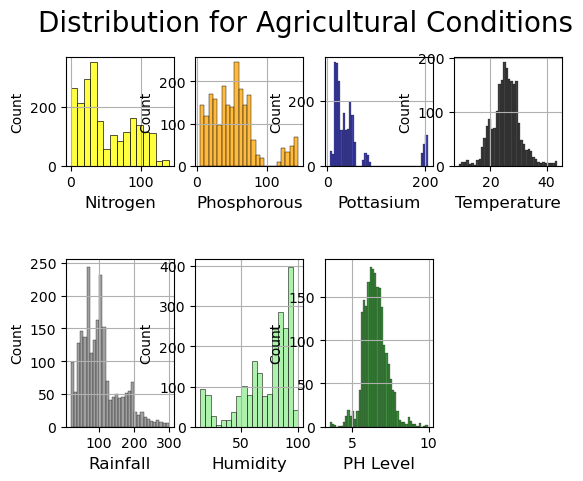

In [16]:
#Checking distributiion for each crop

plt.subplot(3,4,1)
sns.histplot(data['N'], color="yellow")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="darkblue")
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="black")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['rainfall'], color="grey")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['humidity'], color="lightgreen")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['ph'], color="darkgreen")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [17]:
#Checking that crops those have unusual requirements

print("Some Interesting Patterns")
print("...........................................")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [18]:
#Checking which crop to be grown according to the season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("...........................................")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("...........................................")
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops
['rice' 'papaya' 'coconut']


In [19]:
from sklearn.cluster import KMeans

#removing the labels column
x = data.drop(['label'], axis=1)

#selecting all the values of data
x = x.values

#checking the shape
print(x.shape)

(2200, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

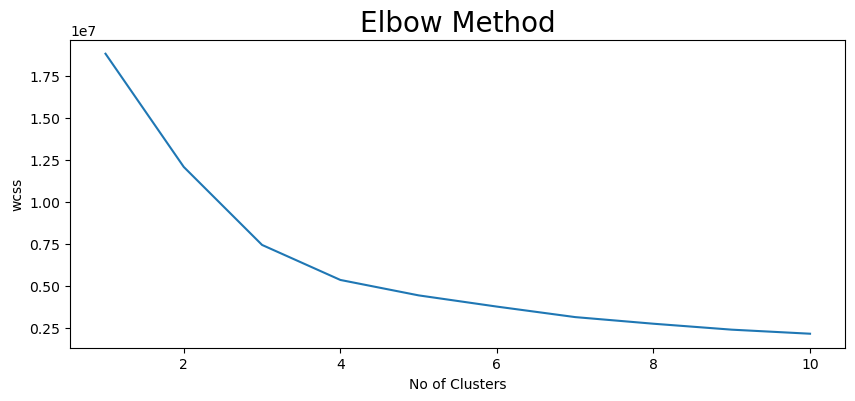

In [19]:
#Determining the optimum number of clusters within the Dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [20]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Finding the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking the clusters for each crop
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("...........................................")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in Third Cluster: ['grapes' 'apple']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [21]:
#Splitting the Dataset for predictive modelling

y = data['label']
x = data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [38]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size = 0.2, random_state = 0)

print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (1760, 7)
The Shape Of x test: (440, 7)
The Shape Of y train: (1760,)
The Shape Of y test: (440,)


In [76]:
#Creating a Predictive Model


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='entropy')





model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [77]:
ypred=model.predict(xtest)


In [2]:
#evaluate
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(ytest,ypred)

print(cm)

NameError: name 'ytest' is not defined

In [1]:
print(confusion_matrix(y_test,y_pred))


NameError: name 'confusion_matrix' is not defined

In [109]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.92      0.94        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

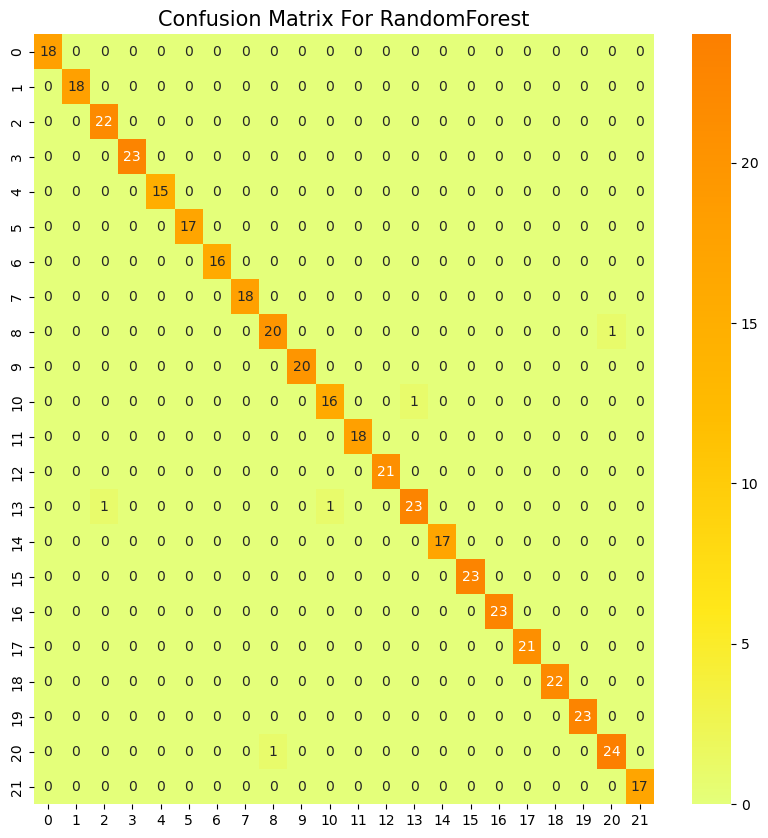

In [81]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For RandomForest', fontsize = 15)
plt.show()

In [82]:
#head of dataset

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [107]:
#prdicting 
prediction = model.predict((np.array([[50, 22, 23, 17, 92, 7, 80]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['orange']


In [105]:
#predicting by taking user input

N = float(input("Enter the ratio of Nitrogen in the soil: "))
P = float(input("Enter the ratio of Phosphorous in the soil: "))
K = float(input("Enter the ratio of Potassium in the soil: "))
temperature = float(input("Enter the temperature in Celsius: "))
humidity = float(input("Enter the relative humidity in percentage: "))
ph = float(input("Enter the pH value of the soil: "))
rainfall = float(input("Enter the rainfall in mm: "))

 # Create feature array from user input
input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
prediction = model.predict(input_data)
print("The Suggested Crop for given climatic condition is :",prediction)

Enter the ratio of Nitrogen in the soil: 50
Enter the ratio of Phosphorous in the soil: 12
Enter the ratio of Potassium in the soil: 43
Enter the temperature in Celsius: 17
Enter the relative humidity in percentage: 92
Enter the pH value of the soil: 7
Enter the rainfall in mm: 80
The Suggested Crop for given climatic condition is : ['pomegranate']
